# Titanic Dataset EDA

## Load and Analyze the Dataset

In [5]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

In [7]:
# Display the first five rows of Dataset
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
#Numvber of row and coulmn
titanic.shape

(891, 15)

In [9]:
# Display data types of each column
print("Data Types of Each Column:")
print(titanic.dtypes)

Data Types of Each Column:
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


In [10]:
# List of columns to be converted to 'category' type
categorical_columns = ['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive', 'adult_male', 'alone']

# Convert specified columns to 'category' type
for col in categorical_columns:
    titanic[col] = titanic[col].astype('category')

# Confirm the conversion
for col in categorical_columns:
    print(f"{col}: {titanic[col].dtype}")


sex: category
embarked: category
class: category
who: category
deck: category
embark_town: category
alive: category
adult_male: category
alone: category


## Handling Missing values and Duplicates

In [11]:
# Check for missing values
print(titanic.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [12]:

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# Identify duplicates
duplicates = titanic[titanic.duplicated()]

# Display duplicate rows
print("Duplicate Rows:")
print(duplicates)


Duplicate Rows:
     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
47          1       3  female   NaN      0      0   7.7500        Q   Third   
76          0       3    male   NaN      0      0   7.8958        S   Third   
77          0       3    male   NaN      0      0   8.0500        S   Third   
87          0       3    male   NaN      0      0   8.0500        S   Third   
95          0       3    male   NaN      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
870         0       3    male  26.0      0      0   7.8958        S   Third   
877         0       3    male  19.0      0      0   7.8958        S   Third   
878         0       3    male   NaN      0      0   7.8958        S   Third   
884         0       3    male  25.0      0      0   7.0500        S   Third   
886         0       2    male  27.0      0      0  13.0000        S  Second   

       who  adult_male deck  embark

In [13]:
# Check for duplicates
print("Duplicate Rows:")
print(titanic[titanic.duplicated()])

# Drop duplicate rows
titanic_cleaned = titanic.drop_duplicates()

# Display the cleaned DataFrame
print("Cleaned DataFrame:")
print(titanic_cleaned)


Duplicate Rows:
     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
47          1       3  female   NaN      0      0   7.7500        Q   Third   
76          0       3    male   NaN      0      0   7.8958        S   Third   
77          0       3    male   NaN      0      0   8.0500        S   Third   
87          0       3    male   NaN      0      0   8.0500        S   Third   
95          0       3    male   NaN      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
870         0       3    male  26.0      0      0   7.8958        S   Third   
877         0       3    male  19.0      0      0   7.8958        S   Third   
878         0       3    male   NaN      0      0   7.8958        S   Third   
884         0       3    male  25.0      0      0   7.0500        S   Third   
886         0       2    male  27.0      0      0  13.0000        S  Second   

       who  adult_male deck  embark

In [14]:
# Calculate median age, most common embarked, and most common embark town beforehand
median_age = titanic['age'].median()
most_common_embarked = titanic['embarked'].mode()[0]
most_common_embark_town = titanic['embark_town'].mode()[0]

# Fill missing values
titanic['age'] = titanic['age'].fillna(median_age)
titanic['embarked'] = titanic['embarked'].fillna(most_common_embarked)
titanic['embark_town'] = titanic['embark_town'].fillna(most_common_embark_town)


In [15]:
# Check the current categories
print(titanic['deck'].cat.categories)

# Add 'Unknown' to the categories
titanic['deck'] = titanic['deck'].cat.add_categories('Unknown')

# Fill missing values in the 'deck' column with 'Unknown'
titanic['deck'] = titanic['deck'].fillna('Unknown')

# Check for missing values
print(titanic.isnull().sum())


Index(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype='object')
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


# Descriptive Analysis

In [16]:
# Descriptive statistics for all columns (numerical and categorical)
print("Descriptive statistics for all columns:")
print(titanic.describe(include='all'))

Descriptive statistics for all columns:
          survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  891.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.361582    0.523008    0.381594   
std       0.486592    0.836071   NaN   13.019697    1.102743    0.806057   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    2.000000   NaN   22.000000    0.000000    0.000000   
50%       0.000000    3.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   35.000000    1.000000    0.000000   
max       1.000000    3.000000   NaN   80.000000    8.000000    6.000000   

              fare embarked  class  who adult_m

C:\Users\PMLS\.idlerc\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


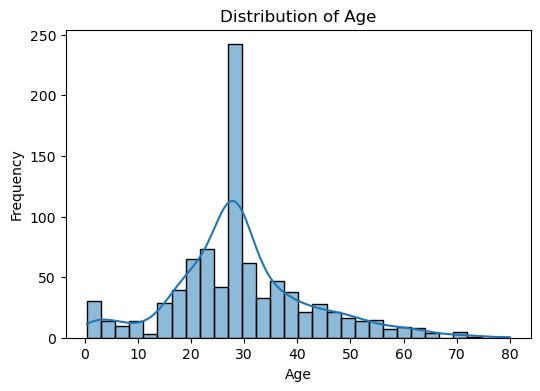

In [17]:
# 1. Distribution of Numerical Variables

# Histogram of age
plt.figure(figsize=(6, 4))
sns.histplot(titanic['age'].dropna(), kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\PMLS\.idlerc\ANACONDA\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


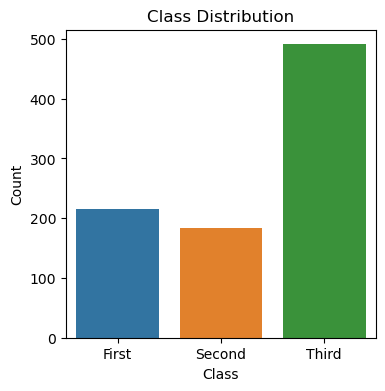

In [18]:

# 2. Categorical Variables

# Bar plot of class
plt.figure(figsize=(4,4))
sns.countplot(x='class', data=titanic)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Missing values in 'embarked' column after mapping: 2


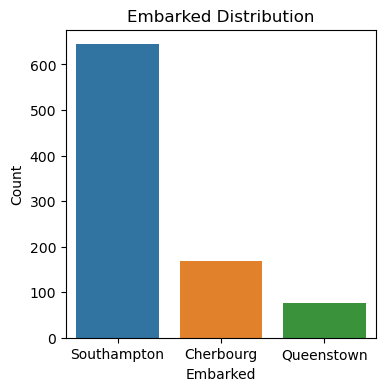

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# Mapping dictionary for embarked codes to full names
embarked_names = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}

# Replace 'embarked' column with full names
titanic['embarked'] = titanic['embarked'].map(embarked_names)

# Check for missing values in 'embarked' column
missing_embarked = titanic['embarked'].isnull().sum()
print(f"Missing values in 'embarked' column after mapping: {missing_embarked}")

# Drop rows with missing values in 'embarked' column if any
titanic.dropna(subset=['embarked'], inplace=True)

# Bar plot of embarked with full names
plt.figure(figsize=(4, 4))
sns.countplot(x='embarked', data=titanic)
plt.title('Embarked Distribution')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()


C:\Users\PMLS\.idlerc\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


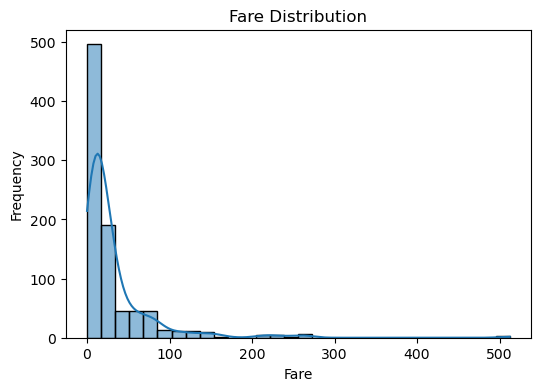

In [20]:
# Histogram of fare distribution
plt.figure(figsize=(6, 4))
sns.histplot(titanic['fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


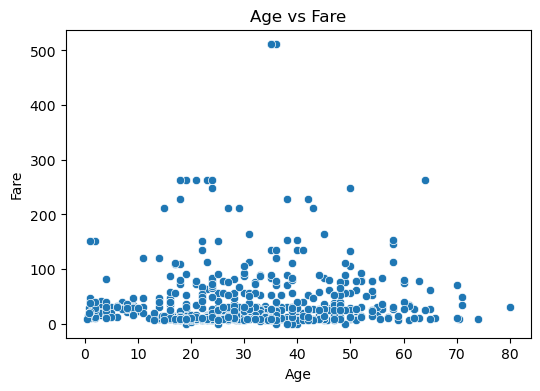

In [21]:
# Scatter plot of age vs fare
plt.figure(figsize=(6,4))
sns.scatterplot(x='age', y='fare', data=titanic)
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

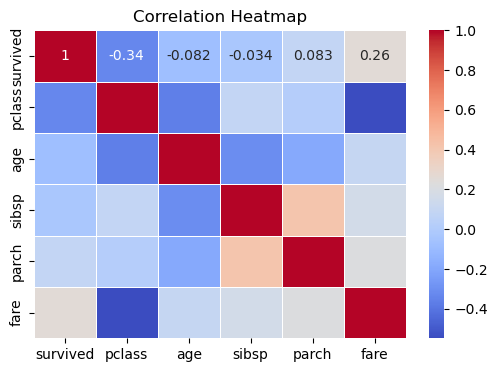

In [22]:

# Select only numeric columns
numeric_cols = titanic.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


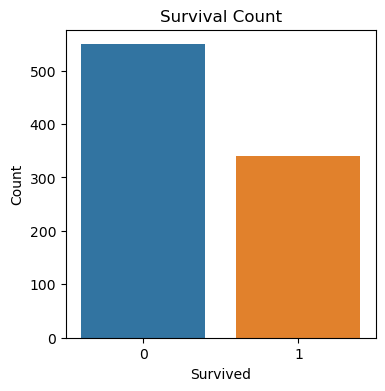

In [23]:
# 4. Survival Analysis

# Count plot of survival
plt.figure(figsize=(4,4))
sns.countplot(x='survived', data=titanic)
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

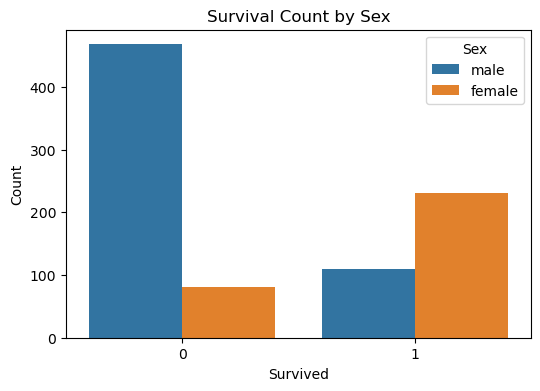

In [24]:
# Count plot of survival based on sex
plt.figure(figsize=(6,4))
sns.countplot(x='survived', hue='sex', data=titanic)
plt.title('Survival Count by Sex')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()

C:\Users\PMLS\.idlerc\ANACONDA\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


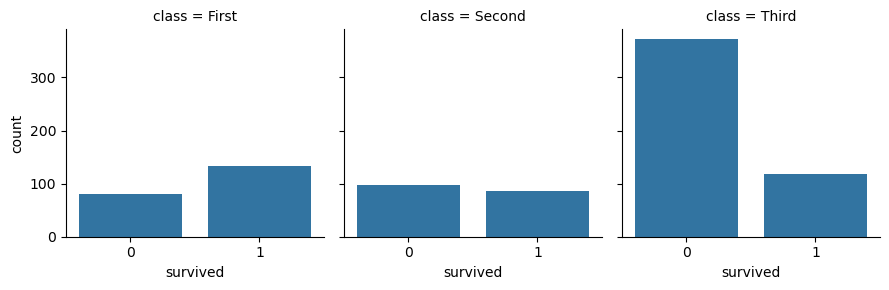

In [25]:
# FacetGrid for survival based on class
g = sns.FacetGrid(titanic, col='class')
g.map(sns.countplot, 'survived')
plt.show()

C:\Users\PMLS\.idlerc\ANACONDA\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


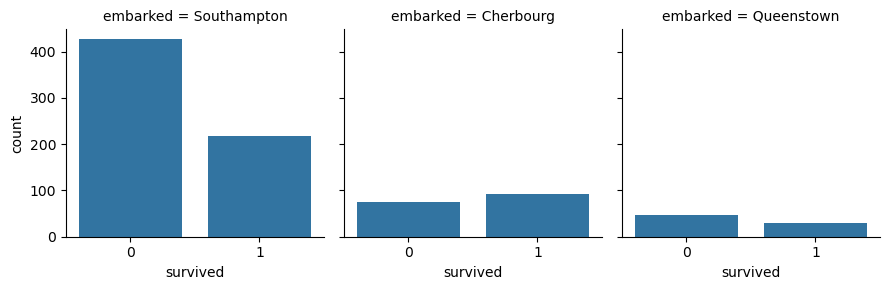

In [26]:
# FacetGrid for survival based on embarked
g = sns.FacetGrid(titanic, col='embarked')
g.map(sns.countplot, 'survived')
plt.show()